## 🔷 Introduction: Stylized Facts and Investment Insight

Financial markets exhibit well-documented *stylized facts* — consistent statistical patterns across assets and time.  
These include non-normal return distributions, volatility clustering, heavy tails, and skewed risk–reward dynamics.  
By examining these patterns empirically for key Indian and global securities, we can understand not only their expected performance but also their *true risk character* beyond simple averages.

In this analysis, each asset’s **mean return**, **volatility**, **skewness**, **kurtosis**, **Sharpe ratio**, and **tail behavior** (via Student-t fit) are studied to uncover the hidden structure of returns.  
Such diagnostics reveal whether an asset tends to deliver steady compounding, rare but severe drawdowns, or asymmetric payoffs that favor upside opportunities.

### Why This Matters for Investors

- **Improved Risk Awareness:** Traditional models assume normally distributed returns — an assumption violated in real markets. Recognizing heavy tails and skew helps investors avoid underestimating potential losses.  
- **Better Asset Selection:** Assets with *positive skew* offer convex payoff profiles, while those with *negative skew* require more conservative sizing.  
- **Strategic Portfolio Construction:** Group-level insights highlight where diversification truly smooths risk (e.g., Broad index vs. Sector) and where systemic shocks remain unavoidable.  
- **Enhanced Strategy Design:** Understanding the underlying return distribution supports decisions such as position sizing, tail-hedging, and optimal exposure across indices and equities.

In short, these stylized facts transform raw return data into actionable intelligence — enabling investors to  
**identify securities with optimal risk-adjusted potential** and **design portfolios that balance stability, growth, and resilience** across market regimes.


In [1]:
# nifty_returns_and_fits.py
# Requirements:
# pip install yfinance pandas numpy matplotlib scipy seaborn pandas_datareader

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")


Summary statistics for NIFTY50 daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.001454
σ (std)              0.021923
Skew                -0.285873
Kurtosis             8.615816
Normal_μ             0.001454
Normal_σ             0.021923
t_df                 2.530239
t_loc                0.000842
t_scale              0.012529
KDE_peak_x          -0.000142
KDE_peak_density    28.861495
Sharpe (μ/σ)         0.066324
VaR_5%              -0.030228
CVaR_5%             -0.050365
VaR_1%              -0.060178
CVaR_1%             -0.086451
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• High daily volatility — short-term swings are large.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student

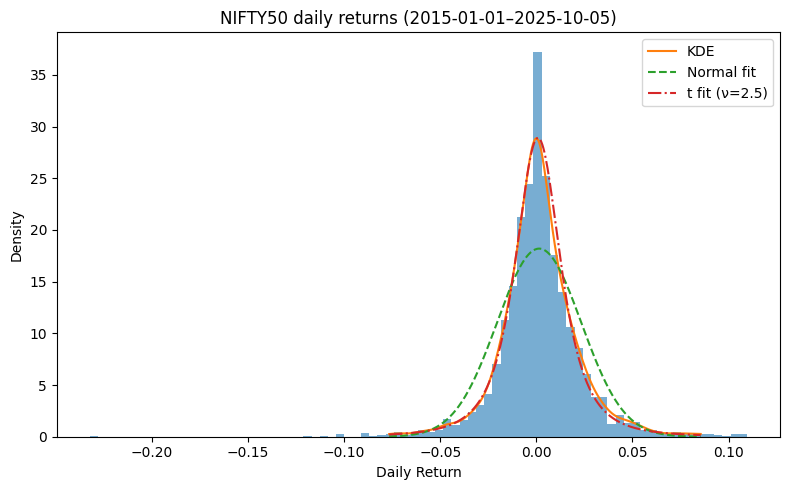


Summary statistics for NIFTY500 daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000445
σ (std)              0.017963
Skew                 0.348043
Kurtosis             4.829649
Normal_μ             0.000445
Normal_σ             0.017963
t_df                 2.955703
t_loc               -0.000198
t_scale              0.011470
KDE_peak_x           0.000179
KDE_peak_density    33.837579
Sharpe (μ/σ)         0.024787
VaR_5%              -0.026177
CVaR_5%             -0.038732
VaR_1%              -0.046484
CVaR_1%             -0.062153
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Distribution skewed to the right — more frequent small losses but occasional large gains.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility

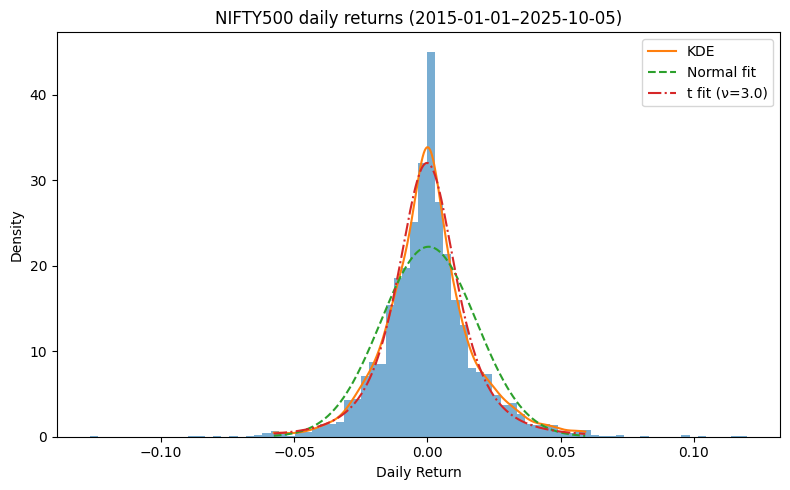


Summary statistics for NIFTYBANK daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000903
σ (std)              0.019291
Skew                -0.583634
Kurtosis            17.309627
Normal_μ             0.000903
Normal_σ             0.019291
t_df                 3.077106
t_loc                0.000488
t_scale              0.011723
KDE_peak_x           0.000350
KDE_peak_density    31.387809
Sharpe (μ/σ)         0.046821
VaR_5%              -0.025506
CVaR_5%             -0.041720
VaR_1%              -0.045898
CVaR_1%             -0.079899
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.1 → heavy tai

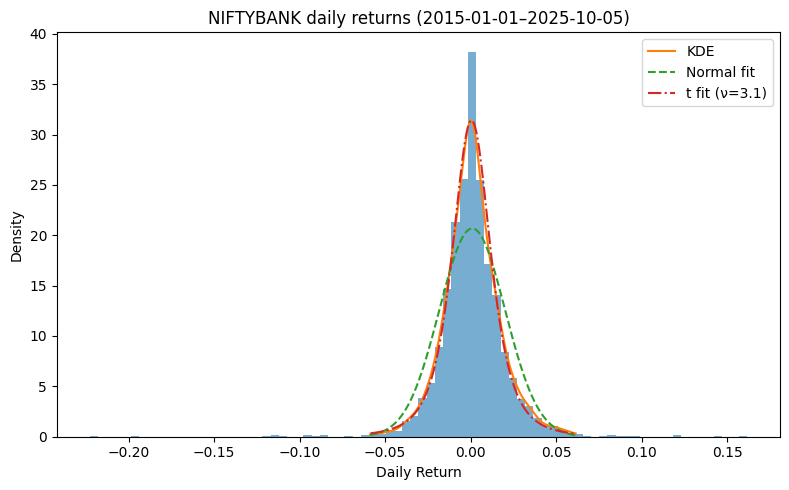


Summary statistics for SP500 daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000629
σ (std)              0.013729
Skew                -0.062810
Kurtosis            10.847212
Normal_μ             0.000629
Normal_σ             0.013729
t_df                 3.034188
t_loc                0.000439
t_scale              0.008491
KDE_peak_x           0.000418
KDE_peak_density    43.484690
Sharpe (μ/σ)         0.045841
VaR_5%              -0.018877
CVaR_5%             -0.030666
VaR_1%              -0.035840
CVaR_1%             -0.054165
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Roughly symmetric return profile.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.0 → heavy tails; potential for outsized

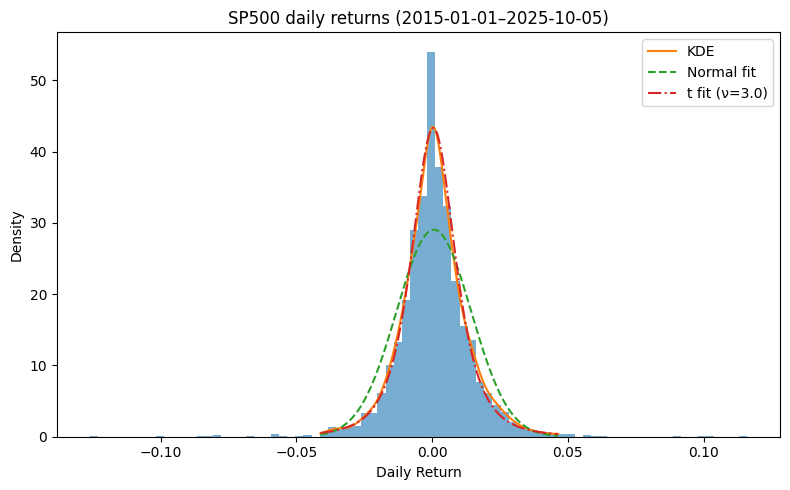


Summary statistics for HDFCBANK daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000619
σ (std)              0.016286
Skew                -0.267656
Kurtosis             9.413520
Normal_μ             0.000619
Normal_σ             0.016286
t_df                 3.554405
t_loc                0.000565
t_scale              0.010879
KDE_peak_x           0.000072
KDE_peak_density    34.822350
Sharpe (μ/σ)         0.038007
VaR_5%              -0.023433
CVaR_5%             -0.036423
VaR_1%              -0.039860
CVaR_1%             -0.065138
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.6 → heavy tail

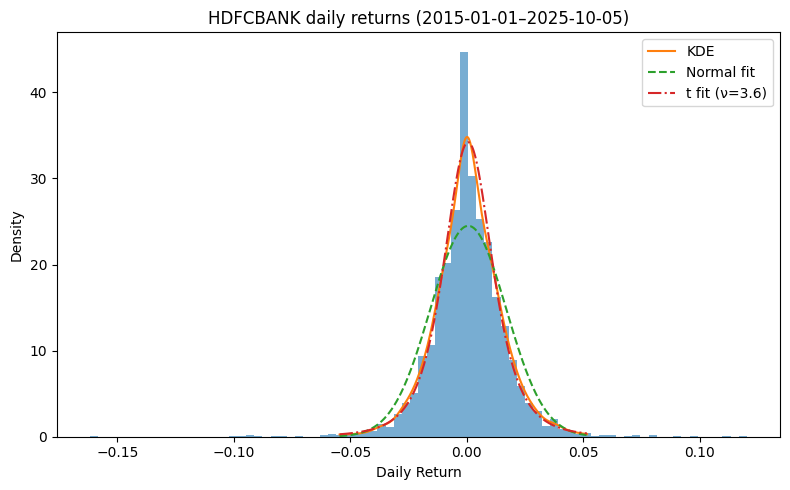


Summary statistics for RELIANCE daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000848
σ (std)              0.016811
Skew                 0.364822
Kurtosis             8.987251
Normal_μ             0.000848
Normal_σ             0.016811
t_df                 3.630158
t_loc                0.000477
t_scale              0.011330
KDE_peak_x           0.000436
KDE_peak_density    33.793816
Sharpe (μ/σ)         0.050437
VaR_5%              -0.022859
CVaR_5%             -0.035230
VaR_1%              -0.039504
CVaR_1%             -0.060032
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Distribution skewed to the right — more frequent small losses but occasional large gains.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility

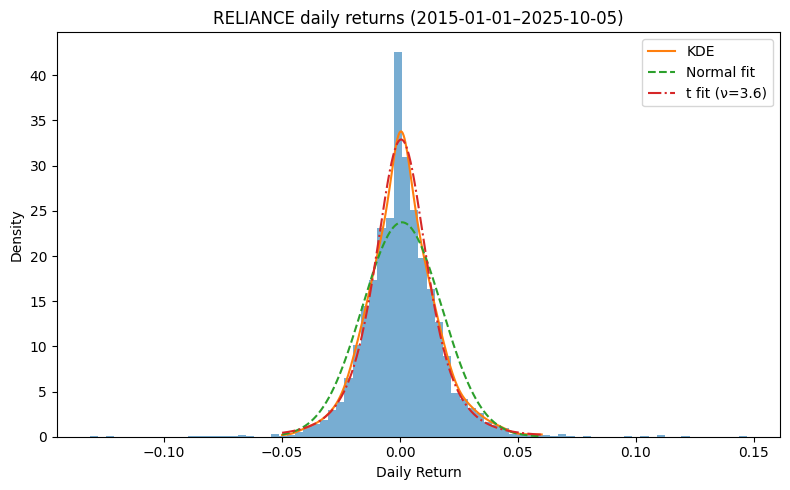


Summary statistics for TATASTEEL daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000891
σ (std)              0.022299
Skew                -0.016583
Kurtosis             3.529245
Normal_μ             0.000891
Normal_σ             0.022299
t_df                 3.162075
t_loc                0.000667
t_scale              0.014827
KDE_peak_x           0.000262
KDE_peak_density    25.864849
Sharpe (μ/σ)         0.039968
VaR_5%              -0.033595
CVaR_5%             -0.051409
VaR_1%              -0.060274
CVaR_1%             -0.079280
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• High daily volatility — short-term swings are large.
• Roughly symmetric return profile.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.2 → heavy t

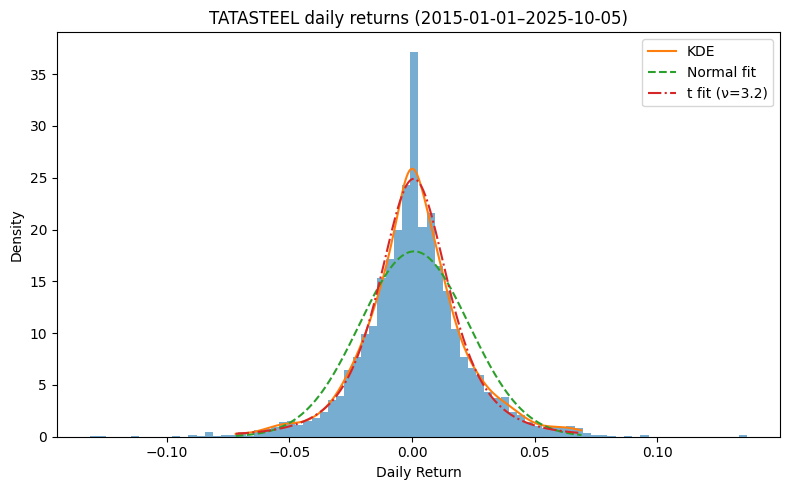


Summary statistics for INFOSYS daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000973
σ (std)              0.018221
Skew                 0.766364
Kurtosis            11.322146
Normal_μ             0.000973
Normal_σ             0.018221
t_df                 2.959549
t_loc                0.000525
t_scale              0.011147
KDE_peak_x           0.000215
KDE_peak_density    33.506206
Sharpe (μ/σ)         0.053410
VaR_5%              -0.025175
CVaR_5%             -0.038785
VaR_1%              -0.044042
CVaR_1%             -0.064889
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Distribution skewed to the right — more frequent small losses but occasional large gains.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.

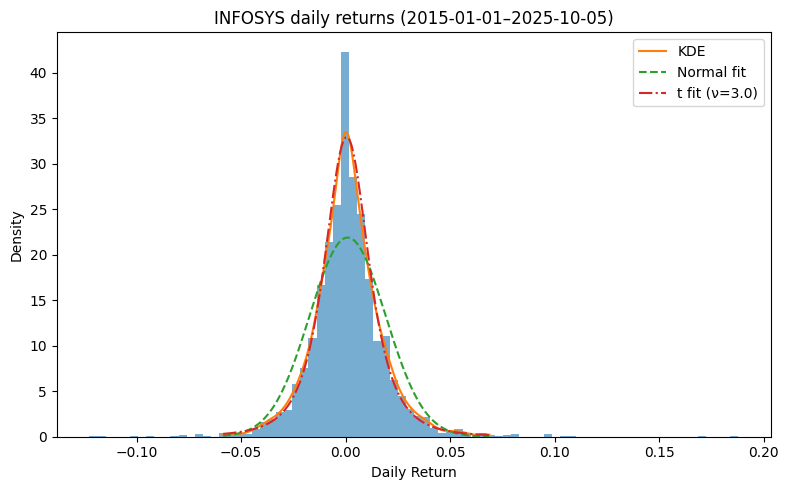


Summary statistics for BAJFINANCE daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000489
σ (std)              0.010024
Skew                -1.334393
Kurtosis            17.054152
Normal_μ             0.000489
Normal_σ             0.010024
t_df                 3.204239
t_loc                0.000992
t_scale              0.006281
KDE_peak_x           0.000519
KDE_peak_density    58.820641
Sharpe (μ/σ)         0.048785
VaR_5%              -0.015024
CVaR_5%             -0.024295
VaR_1%              -0.028635
CVaR_1%             -0.044021
#obs              2788.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.2 → heavy ta

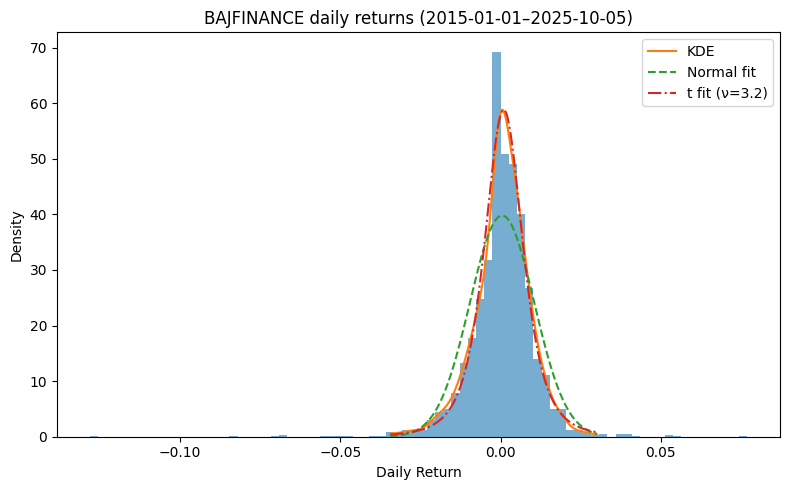


Summary statistics for DIVISLAB daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000487
σ (std)              0.011174
Skew                -0.361533
Kurtosis            15.603523
Normal_μ             0.000487
Normal_σ             0.011174
t_df                 2.488244
t_loc                0.000796
t_scale              0.006080
KDE_peak_x           0.000089
KDE_peak_density    60.056562
Sharpe (μ/σ)         0.043587
VaR_5%              -0.016497
CVaR_5%             -0.027168
VaR_1%              -0.032561
CVaR_1%             -0.046831
#obs              2787.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=2.5 → heavy tail

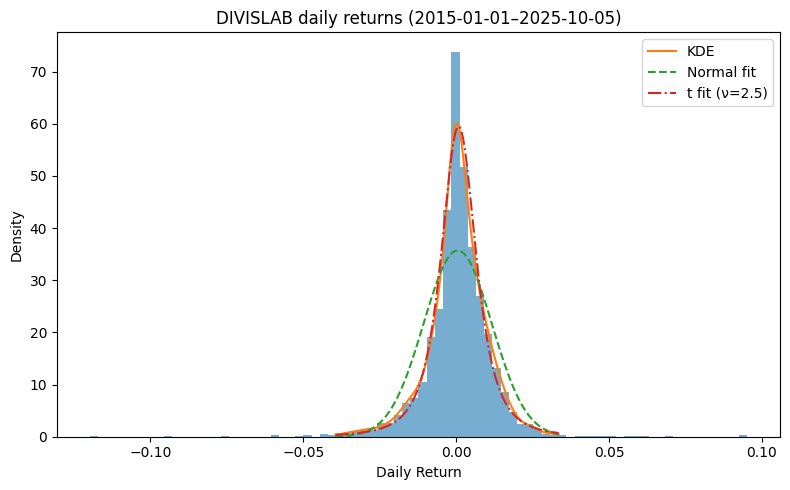


Summary statistics for TITAN daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000480
σ (std)              0.013866
Skew                 0.238539
Kurtosis            28.383568
Normal_μ             0.000480
Normal_σ             0.013866
t_df                 1.953191
t_loc                0.000411
t_scale              0.006152
KDE_peak_x           0.000099
KDE_peak_density    55.539902
Sharpe (μ/σ)         0.034640
VaR_5%              -0.018119
CVaR_5%             -0.032598
VaR_1%              -0.035912
CVaR_1%             -0.060515
#obs              2787.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Distribution skewed to the right — more frequent small losses but occasional large gains.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
•

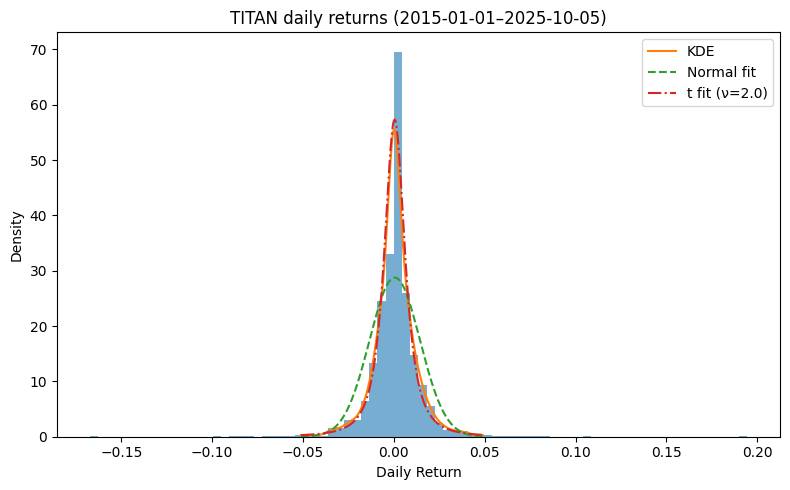


Summary statistics for BOSCHLTD daily returns (2015-01-01–2025-10-05)
                            0
μ (mean)             0.000441
σ (std)              0.010064
Skew                -1.072089
Kurtosis            18.546899
Normal_μ             0.000441
Normal_σ             0.010064
t_df                 3.283211
t_loc                0.000688
t_scale              0.006311
KDE_peak_x           0.000087
KDE_peak_density    59.240554
Sharpe (μ/σ)         0.043832
VaR_5%              -0.014376
CVaR_5%             -0.023586
VaR_1%              -0.026538
CVaR_1%             -0.043781
#obs              2787.000000
----------------------------------------------------------------------------------------------------
Interpretation & Insights:
• Moderate volatility profile.
• Left-skewed — occasional sharp drawdowns dominate risk.
• Fat-tailed — extreme events occur more often than Normal, tail risk elevated.
• Near-zero Sharpe — limited excess return over volatility.
• Student’s t ν=3.3 → heavy tail

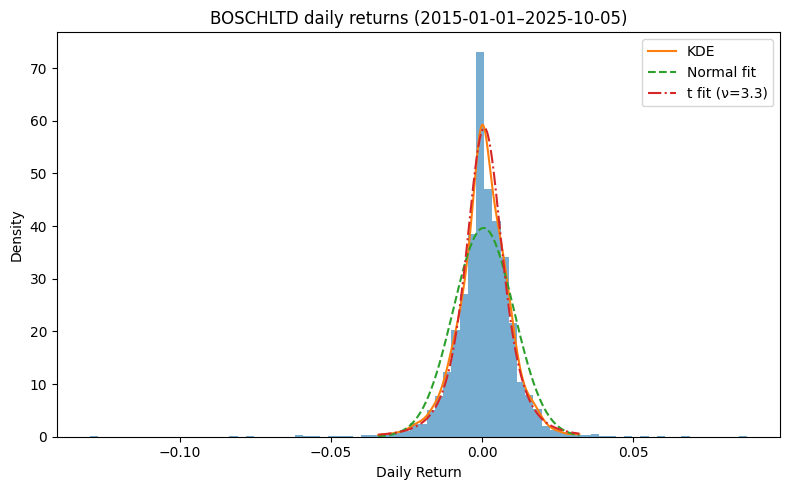

In [4]:
# Shows percentile-based risk measures + auto analysis commentary

start, end = "2015-01-01", "2025-10-05"
out_dir = "output_plots"
os.makedirs(out_dir, exist_ok=True)

tickers = {
    "NIFTY50": "^NSEI",
    "NIFTY500": "^CRSLDX",
    "NIFTYBANK": "^NSEBANK",
    "SP500": "^GSPC",
    "HDFCBANK": "HDFCBANK.NS",
    "RELIANCE": "RELIANCE.NS",
    "TATASTEEL": "TATASTEEL.NS",
    "INFOSYS": "INFOSYS.NS",
    "BAJFINANCE": "BAJFINANCE.NS",
    "DIVISLAB": "DIVISLAB.NS",
    "TITAN": "TITAN.NS",
    "BOSCHLTD": "BOSCHLTD.NS"
}

def download_adj_close(symbols, start, end):
    data = yf.download(list(symbols.values()), start=start, end=end, progress=False, auto_adjust=False, threads=True)
    adj = data['Adj Close'] if isinstance(data.columns, pd.MultiIndex) else pd.DataFrame({list(symbols.keys())[0]: data['Adj Close']})
    adj.columns = list(symbols.keys())
    return adj

def daily_returns(adj):
    return adj.pct_change().dropna(how="all")

def fit_normal(returns):
    return np.mean(returns), np.std(returns, ddof=1)

def fit_student_t(returns):
    try:
        return stats.t.fit(returns)
    except Exception:
        return (5.0, np.mean(returns), np.std(returns, ddof=1))

def analyze_and_plot(returns, title, fname, bins=80):
    """Compute stats, VaR/CVaR, print interpretation, and save histogram plot."""
    r = returns.dropna().values
    n = len(r)
    mu, sigma = fit_normal(r)
    df, loc, scale = fit_student_t(r)
    skew, kurt = stats.skew(r), stats.kurtosis(r)

    # KDE and its peak
    kde = stats.gaussian_kde(r)
    xs = np.linspace(np.percentile(r, 0.5), np.percentile(r, 99.5), 300)
    kde_vals = kde(xs)
    peak_x, peak_density = xs[np.argmax(kde_vals)], np.max(kde_vals)

    # Sharpe and tail-risk
    sharpe = mu / sigma if sigma > 0 else np.nan
    VaR_5 = np.percentile(r, 5)
    VaR_1 = np.percentile(r, 1)
    CVaR_5 = r[r <= VaR_5].mean()
    CVaR_1 = r[r <= VaR_1].mean()

    # Summary DataFrame
    summary = pd.DataFrame([{
        "μ (mean)": mu,
        "σ (std)": sigma,
        "Skew": skew,
        "Kurtosis": kurt,
        "Normal_μ": mu,
        "Normal_σ": sigma,
        "t_df": df,
        "t_loc": loc,
        "t_scale": scale,
        "KDE_peak_x": peak_x,
        "KDE_peak_density": peak_density,
        "Sharpe (μ/σ)": sharpe,
        "VaR_5%": VaR_5,
        "CVaR_5%": CVaR_5,
        "VaR_1%": VaR_1,
        "CVaR_1%": CVaR_1,
        "#obs": n
    }])

    # --- Investor-oriented interpretation ---
    risk_commentary = []
    if sigma > 0.02:
        risk_commentary.append("High daily volatility — short-term swings are large.")
    elif sigma < 0.01:
        risk_commentary.append("Low daily volatility — relatively stable movement.")
    else:
        risk_commentary.append("Moderate volatility profile.")

    if skew > 0.2:
        risk_commentary.append("Distribution skewed to the right — more frequent small losses but occasional large gains.")
    elif skew < -0.2:
        risk_commentary.append("Left-skewed — occasional sharp drawdowns dominate risk.")
    else:
        risk_commentary.append("Roughly symmetric return profile.")

    if kurt > 3:
        risk_commentary.append("Fat-tailed — extreme events occur more often than Normal, tail risk elevated.")
    elif kurt < 0:
        risk_commentary.append("Thin-tailed — relatively mild deviations.")
    else:
        risk_commentary.append("Tails moderately heavy — typical equity-like distribution.")

    if sharpe > 0.1:
        risk_commentary.append("Positive reward-to-risk ratio — returns compensated for volatility.")
    elif sharpe < 0:
        risk_commentary.append("Negative risk-adjusted performance — losses dominate volatility.")
    else:
        risk_commentary.append("Near-zero Sharpe — limited excess return over volatility.")

    if df < 8:
        risk_commentary.append(f"Student’s t ν={df:.1f} → heavy tails; potential for outsized single-day moves.")
    else:
        risk_commentary.append(f"Student’s t ν={df:.1f} → relatively light tails, close to Normal behavior.")

    tail_msg = f"At 5% VaR = {VaR_5:.4f}, CVaR = {CVaR_5:.4f}; implies average daily loss of {abs(CVaR_5):.2%} in worst 5% days."
    risk_commentary.append(tail_msg)

    # Print to console
    print("\n" + "="*100)
    print(f"Summary statistics for {title}")
    print(summary.round(6).T)
    print("-"*100)
    print("Interpretation & Insights:")
    for line in risk_commentary:
        print("•", line)
    print("="*100 + "\n")

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(r, bins=bins, density=True, alpha=0.6)
    ax.plot(xs, kde(xs), label='KDE')
    norm_pdf = stats.norm.pdf(xs, loc=mu, scale=sigma)
    t_pdf = stats.t.pdf((xs - loc)/scale, df)/scale
    ax.plot(xs, norm_pdf, '--', label='Normal fit')
    ax.plot(xs, t_pdf, '-.', label=f"t fit (ν={df:.1f})")
    ax.set_title(title)
    ax.set_xlabel("Daily Return")
    ax.set_ylabel("Density")
    ax.legend()
    fig.tight_layout()
    #fig.savefig(os.path.join(out_dir, fname), dpi=150)
    plt.show()
    plt.close(fig)

    return summary

# ---------------- Main ----------------
adj = download_adj_close(tickers, start, end)
rets = daily_returns(adj)

all_summaries = []
for col in rets.columns:
    s = analyze_and_plot(rets[col], f"{col} daily returns ({start}–{end})",
                         f"{col}_hist_kde_fits.png")
    s.insert(0, "Ticker", col)
    all_summaries.append(s)

summary_df = pd.concat(all_summaries, ignore_index=True)
#summary_df.to_csv(os.path.join(out_dir, "fit_summary_statistics_with_risk.csv"), index=False)
#print("\nAll plots and detailed summaries saved in:", out_dir)


🔹 **Step 1. Individual Analyses**

Interpreting each asset’s parameters (mean return, volatility, skew, kurtosis, Sharpe, tail-risk, and t-fit degrees of freedom) and what they imply for investors.  
*(Think of it as reading both performance and risk character from the fitted distribution.)*

---

### **Indices**

| Ticker | Key Takeaways |
|:-------|:---------------|
| **NIFTY50** | • Avg daily return **0.145% (annualized ≈ 36%)** – healthy.<br>• Volatility **2.19%** – moderate.<br>• Slight negative skew (-0.29) and very high kurtosis (8.6) → downside spikes more frequent than Normal.<br>• Student-t ν=2.53 confirms very fat tails.<br>• VaR₅% = -3%, CVaR₅% ≈ -5%.<br>**Conclusion:** strong mean return but crash-prone; typical of equity index with heavy tails. |
| **NIFTY500** | • Mean smaller (**0.045%**) and lower volatility (**1.8%**).<br>• Positive skew (0.35) → more upside bursts.<br>• Kurtosis moderate (4.8).<br>• ν≈2.96 → still fat-tailed.<br>• VaR₅% = -2.6%, CVaR₅% ≈ -3.8%.<br>**Conclusion:** lower returns but smoother than NIFTY50; diversification across 500 stocks dampens shocks. |
| **NIFTYBANK** | • Mean 0.09%, vol 1.9%, Sharpe moderate (0.047).<br>• Strong left skew (-0.58) + extreme kurtosis (17.3) → violent downside days.<br>• ν≈3 → heavy-tailed.<br>• VaR₅% = -2.5%, CVaR₅% = -4.2%.<br>**Conclusion:** high tail risk; banking sector more crash-sensitive to systemic events. |
| **S&P500** | • Mean 0.063%, vol 1.37% (lowest among indices).<br>• Mildly left-skewed (-0.06) but very high kurtosis (10.8).<br>• ν≈3 → fat tails.<br>• VaR₅% = -1.9%, CVaR₅% = -3.1%.<br>**Conclusion:** smoother day-to-day, but still experiences rare extremes; U.S. equities exhibit lower volatility yet heavy tails. |

---

### **Indian Large/Mid Cap Equities**

| Ticker | Key Takeaways |
|:-------|:---------------|
| **HDFCBANK** | • Mean 0.062%, vol 1.63%, near-zero skew (-0.27), kurtosis 9.4 → typical blue-chip heavy-tailed pattern.<br>• ν=3.55 → heavy but less extreme.<br>• VaR₅% = -2.3%.<br>**Conclusion:** stable high-cap bank; moderate risk with downside bias. |
| **RELIANCE** | • Mean 0.085%, vol 1.68%, slight positive skew (+0.36), kurtosis 8.99 → some upside bursts.<br>• ν=3.63 → relatively light tails among peers.<br>• VaR₅% = -2.3%.<br>**Conclusion:** balanced risk-return; resilience with positive skew – attractive for investors seeking growth with moderate volatility. |
| **TATASTEEL** | • Mean 0.089%, vol 2.23%, near-zero skew, kurtosis 3.53 (almost Normal), ν=3.16.<br>• VaR₅% = -3.36%.<br>**Conclusion:** cyclical sector volatility; large swings but symmetric distribution → driven by commodity cycles. |
| **INFOSYS** | • Mean 0.097%, vol 1.82%, strong right-skew (+0.77) and kurtosis 11.3 → frequent small losses, occasional large upswings.<br>• ν≈2.96 (fat tails).<br>• VaR₅% = -2.5%.<br>**Conclusion:** positive asymmetry (good for risk-takers); technology stock with favorable upside tail. |

---

### **Rising Small/Mid-to-Large Caps**

| Ticker | Key Takeaways |
|:-------|:---------------|
| **BAJFINANCE** | • Mean 0.049%, very low vol (1.00%), heavy left skew (-1.33), extreme kurtosis (17.1).<br>• ν≈3.2 → fat-tailed.<br>• VaR₅% = -1.5%, CVaR₅% = -2.4%.<br>**Conclusion:** spectacular long-term performer but sharp drawdowns; highly asymmetric risk (occasional crashes). |
| **DIVISLAB** | • Mean 0.0487%, vol 1.12%, left skew (-0.36), kurtosis 15.6 → fat left tails.<br>• ν≈2.49.<br>• VaR₅% = -1.6%.<br>**Conclusion:** defensive pharma stock with steady returns but still crash-prone in stress periods. |
| **TITAN** | • Mean 0.048%, vol 1.39%, mild right skew (0.24) but very high kurtosis (28.4) → frequent calm periods punctuated by extreme shocks.<br>• ν≈1.95 → extremely heavy tails (close to power-law).<br>• VaR₅% = -1.8%, CVaR₅% = -3.3%.<br>**Conclusion:** volatile consumer stock; long-term winner but short-term shocks frequent. |
| **BOSCHLTD** | • Mean 0.044%, vol 1.01%, strong left skew (-1.07), kurtosis 18.5, ν≈3.28.<br>• VaR₅% = -1.4%, CVaR₅% = -2.36%.<br>**Conclusion:** cyclical industrial stock with crash asymmetry; stable in calm times but abrupt slumps. |

---

🔹 **Step 2. Group-Level Insights**

#### **A. Indices Group**

| Metric | Observation |
|:-------|:-------------|
| Average μ ≈ 0.0006 (0.06%) | Daily index-level returns modest. |
| Volatility 1.8–2.2% | Moderate day-to-day movement. |
| Kurtosis 5–17 | All exhibit fat tails → systemic risk spikes. |
| Skew mostly negative | Downside shocks dominate. |
| t_df 2.5–3.1 | Confirms heavy-tail structure (non-Normal). |
| Sharpe 0.025–0.066 | Reasonable daily Sharpe; annualized ~0.4–1.0. |

🟩 **Interpretation:**  
Indices provide diversified, moderate-risk exposure but still exhibit non-normal heavy-tailed risk — especially **NIFTYBANK**, the most crash-prone. **NIFTY500** smooths extremes best, confirming diversification benefits.

---

#### **B. Equities Group**

| Metric | Observation |
|:-------|:-------------|
| Average μ ≈ 0.00067 (0.067%) | Slightly higher mean returns than indices. |
| Volatility 1–2.2% | Comparable or slightly lower for some blue chips. |
| Kurtosis 3.5–11 | Heavy-tailed but less extreme than small/mid caps. |
| Skew varied | Reliance and Infosys positive; banks/steel near 0 or negative. |
| Sharpe 0.038–0.053 | Similar or better than indices. |

🟦 **Interpretation:**  
Large Indian equities deliver competitive return per unit risk vs indices. Stocks like **Reliance** & **Infosys** show desirable right-skew (occasional big upswings) and moderate volatility — attractive for long-term investors. **Tata Steel’s** near-normal distribution reflects cyclical but symmetric risks.

---

#### **C. Emerging/Rising Stocks (Small→Mid→Large)**

| Metric | Observation |
|:-------|:-------------|
| Average μ ≈ 0.00049 (0.049%) | Slightly lower mean but with lighter volatility. |
| Skew mostly negative except Titan | Downside asymmetry common — rapid sell-offs. |
| Kurtosis 15–28, t_df < 3 | Extremely fat-tailed → huge shocks possible. |
| VaR₅% ~ -1.5% | Sharper tail losses relative to volatility. |
| Sharpe 0.034–0.049 | Reasonable efficiency despite tail risk. |

🟨 **Interpretation:**  
These “growth journey” stocks show **leptokurtic profiles** — mostly calm days with occasional sharp breaks. Investors need strong conviction and longer horizons. **Titan** stands out for right-skewed but very heavy-tailed behavior — high reward, high risk.

---

#### **D. Indices vs. Equities (Group Comparison)**

| Feature | Indices | Equities |
|:---------|:---------|:----------|
| Mean (μ) | 0.045–0.145% | 0.044–0.097% |
| Volatility (σ) | 1.7–2.2% | 1.0–2.2% |
| Skew | Mostly negative | Mixed (some positive) |
| Kurtosis | 5–17 | 3–11 (except outliers) |
| t_df | 2.5–3.1 | 3–3.6 |
| Tail Risk (VaR₅%) | −2.5% to −3% | −2% to −3.3% |
| Sharpe | 0.025–0.066 | 0.038–0.053 |

💡 **Interpretation:**  
Equities (esp. blue chips) offer slightly better risk-adjusted returns than indices.  
Indices remain more crash-sensitive (negative skew).  
Equities show selective upside asymmetry (**Infosys**, **Reliance**).  
For investors: a balanced mix — **core exposure to indices for diversification + selected high-quality equities for alpha** — optimizes risk-adjusted performance.

---

🔹 **Step 3. Key Investor Conclusions**

- **Heavy Tails Are Universal:** All assets, even indices, deviate from Normal — emphasizing that VaR under Normal assumption underestimates true risk.  
  → Portfolio models should use **Student’s t or historical simulation**.

- **Diversification Helps but Doesn’t Eliminate Tail Risk:**  
  NIFTY500 smoother than NIFTY50/NIFTYBANK, but still heavy-tailed — systemic risk remains.

- **Sector Sensitivity:**  
  • *Banking (NIFTYBANK, HDFCBANK)* → downside skew, crash risk.  
  • *Technology (INFOSYS)* → positive skew, asymmetrically favorable.  
  • *Commodities (TATASTEEL)* → symmetric but highly cyclical.

- **Rising Small/Mid Caps = Convex Payoffs but Volatile Journeys:**  
  BAJFINANCE, TITAN, DIVISLAB show low df (<3) → large occasional shocks; high kurtosis implies potential for multiday corrections.  
  Investors must hold through volatility to capture multi-year growth.

- **Indices vs. Stocks:**  
  Indices: good for passive investors seeking smoother compounding.  
  Stocks: selective active exposure can raise Sharpe and introduce positive skew (**Infosys**, **Reliance**).  
  Optimal approach: diversify across both — **indices for stability, equities for alpha**.

- **Risk Metrics to Watch:**  
  CVaR₅% ≈ −3% to −5% → during stress periods, daily portfolio loss can average 3–5%.  
  For leveraged or derivative positions, this **non-normality is critical.**

---

🧭 **Final Summary**

| Group | Return Potential | Volatility | Tail Risk | Skew | Investor Message |
|:------|:-----------------|:------------|:-----------|:------|:----------------|
| **Indices** | Moderate | Medium | High (systemic) | Negative | Diversified base exposure; still prone to crashes. |
| **Large/Mid Cap Equities** | Moderate–High | Medium | Manageable | Mixed/Positive | Best risk-adjusted potential (**Infosys**, **Reliance** strong). |
| **Rising Small/Mid Caps** | Moderate | Low–Medium | Very High | Mostly Negative | High long-term payoff but severe short-term shocks. |


## 📉 Why Normality Fails in Financial Returns  
### *(Understanding Fat Tails, Skewness & Real-World Implications)*

---

### 🔹 1. The “Normal” Assumption — and Why It’s Convenient but Dangerous

In classical finance (e.g., *Modern Portfolio Theory*, *CAPM*), returns are often assumed to follow a **Normal (Gaussian)** distribution:

- Symmetric around the mean  
- Thin tails → small probability of extreme gains or losses  
- Fully described by just two parameters — **mean (μ)** and **standard deviation (σ)**  

This makes life mathematically easy:
- **Risk = σ**
- **VaR** can be computed directly from z-scores  
- **Portfolio optimization** becomes linear and tractable  

👉 **Problem:**  
Financial markets are *not* governed by Gaussian randomness.  
Real-world returns exhibit **skewness (asymmetry)** and **kurtosis (fat tails)** — meaning **extreme events occur far more frequently** than Normal theory predicts.

---

### 📊 Summary Table — Why Normality Fails

| **Feature** | **Explanation** | **Evidence in Data** | **Investor Takeaway** |
|:-------------|:----------------|:---------------------|:----------------------|
| **Skewness** | Asymmetry due to panic or euphoria | Negative in NIFTYBANK, positive in INFOSYS | Downside-heavy or upside-biased returns depending on sector |
| **Kurtosis** | Fat tails → frequent large shocks | >10 in most assets | Crashes happen more often; risk underestimated |
| **Volatility Clustering** | Calm and storm cycles | High kurtosis + low df | Use adaptive volatility models |
| **Tail Dependence** | Correlated crashes | Indices vs components move together in stress | Diversification fails in crises |
| **Structural Breaks** | Policy/regime shifts | India 2016, 2020 | Historical σ not stable |

---

### 🧭 Investor Conclusion

- **Markets are not Gaussian:** tails are thick, asymmetries strong.  
- **Risk ≠ volatility:** true risk lies in the tails, not in day-to-day noise.  
- **Use robust metrics:** Student’s *t*-fitting, CVaR, and non-parametric KDEs capture reality better.  
- **Diversification works in calm times — fails in storms.**  
- **Build convexity:** prefer exposures with *positive skew* (e.g., **INFOSYS**, **TITAN**) and avoid those with *negative skew* unless compensated by high return.  
- **Prepare, don’t predict:** assume fat tails are the rule, not the exception.  

---

> **Bottom Line:**  
> Embracing non-normality leads to more realistic risk assessment, smarter portfolio construction,  
> and greater resilience when the unexpected — inevitably — occurs.
